## CyberEye

### Fault detection in power grid using deep learning

Dataset consists of simulation data.

Data format:
- save(filename,'t','omega','FDg','FDl','DFg','DFl','fault');
- t: time (matriz of x by 1)
- Omega: generators angle, related to stability rad/sec (matrix of x by 16) where 16 is the number of generators.
- FDg: frequency deviation of generators (matrix of x by 16)
- FDl: frequency deviation of load buses (matrix of x by 52)
- DFg: rate of change in frequency for generators (matrix of x by 16)
- DFl: rate of change in frequency for load buses (matrix of x by 52)
- Fault: the bus number where the 3-phase fault happened. (variable)

Resources:
- Deep Learning for Time-Series Forecasting https://github.com/Haoran-Zhao/Deep-Learning-for-Time-Series-Forecasting
- Time series prediction https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
- Intro to Anomaly Detection in Time Series Using Keras https://github.com/khadija267/Time-Series-Anomaly-Detection/blob/master/Anomaly_Detection_Time_Series_Keras(3).ipynb
- Time series anomaly detection with **LSTM** https://towardsdatascience.com/time-series-of-price-anomaly-detection-with-lstm-11a12ba4f6d9
- Time series anomaly detection using **autoencoder** - Keras - https://keras.io/examples/timeseries/timeseries_anomaly_detection/
- Time series **classification** using Keras https://keras.io/examples/timeseries/

In [3]:
from scipy.io import loadmat

In [23]:
# Load file

fname = 'Fault_17.mat'
annots = loadmat('/Users/edogdu/Downloads/' + fname)

In [24]:
# time points
timeline = annots['t'].tolist()
# length of time
len(timeline)

29995

In [25]:
# rate of change for buses
ratechange = annots['DFl']
# frequency deviation for buses
freqdev = annots['FDl']

In [26]:
ratechange.shape

(29995, 52)

In [29]:
bus2rc  = [bus[1] for bus in ratechange]
bus15rc = [bus[14] for bus in ratechange]
bus16rc = [bus[15] for bus in ratechange]
bus17rc = [bus[16] for bus in ratechange]
bus18rc = [bus[17] for bus in ratechange]
bus2fd  = [bus[1] for bus in freqdev]
bus15fd = [bus[14] for bus in freqdev]
bus16fd = [bus[15] for bus in freqdev]
bus17fd = [bus[16] for bus in freqdev]
bus18fd = [bus[17] for bus in freqdev]
len(bus17)

29995

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

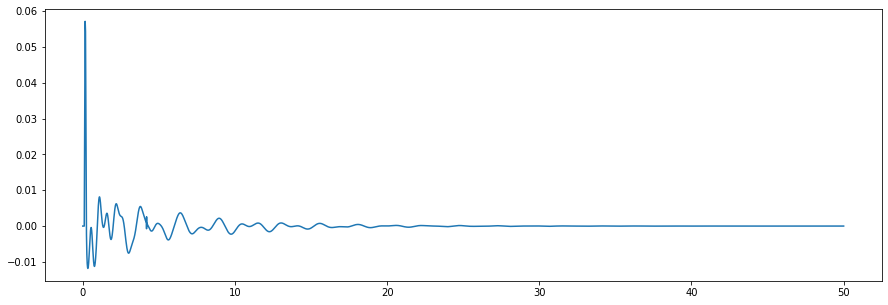

In [31]:
# bus17 signal

plt.figure(figsize=(15,5))
#plt.plot(timeline,bus2)
plt.plot(timeline[::1],bus18rc[::1])

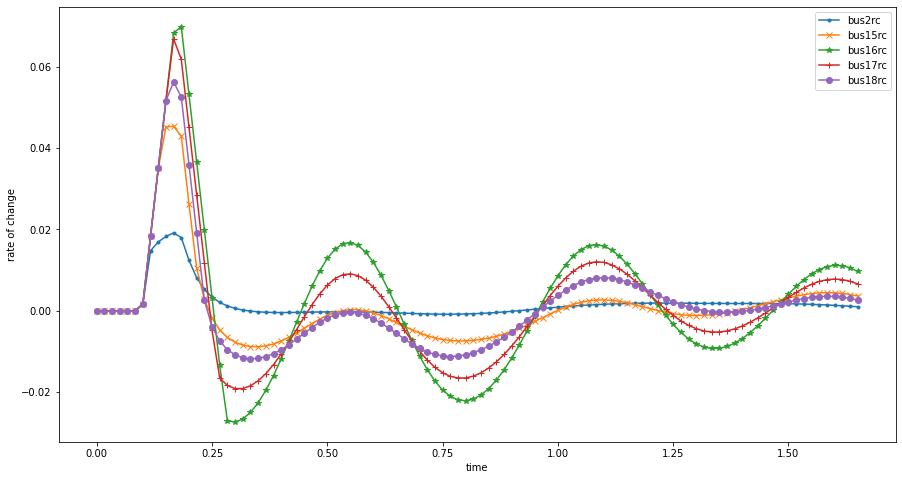

In [32]:
# Rate of change for bus 2,15,16,17,18 signals

plt.figure(figsize=(15,8))
step = 10
stop = 1000
plt.plot(timeline[0:stop:step],bus2rc[0:stop:step],  marker='.', label='bus2rc')
plt.plot(timeline[0:stop:step],bus15rc[0:stop:step], marker='x', label='bus15rc')
plt.plot(timeline[0:stop:step],bus16rc[0:stop:step], marker='*', label='bus16rc')
plt.plot(timeline[0:stop:step],bus17rc[0:stop:step], marker='+', label='bus17rc')
plt.plot(timeline[0:stop:step],bus18rc[0:stop:step], marker='o', label='bus18rc')
plt.ylabel('rate of change')
plt.xlabel('time')
plt.legend()

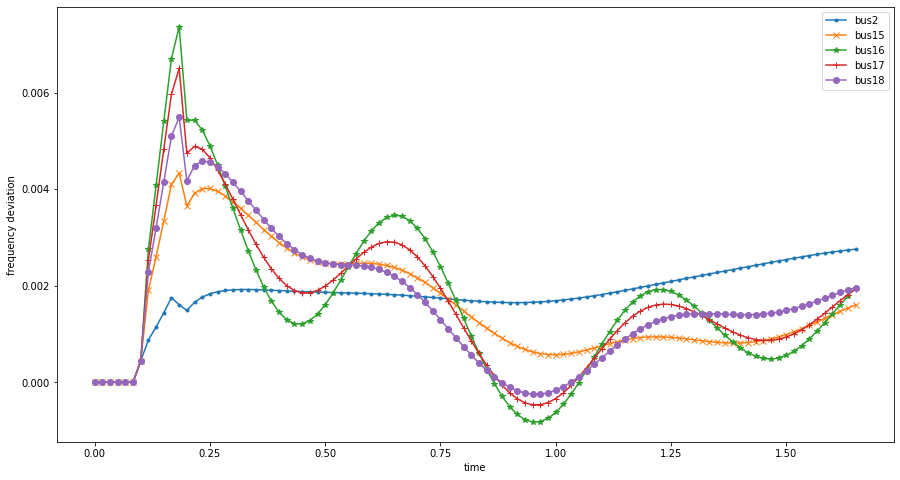

In [33]:
# Frequency deviation for bus 2,15,16,17,18 signals

plt.figure(figsize=(15,8))
step = 10
stop = 1000
plt.plot(timeline[0:stop:step],bus2fd[0:stop:step],  marker='.', label='bus2')
plt.plot(timeline[0:stop:step],bus15fd[0:stop:step], marker='x', label='bus15')
plt.plot(timeline[0:stop:step],bus16fd[0:stop:step], marker='*', label='bus16')
plt.plot(timeline[0:stop:step],bus17fd[0:stop:step], marker='+', label='bus17')
plt.plot(timeline[0:stop:step],bus18fd[0:stop:step], marker='o', label='bus18')
plt.ylabel('frequency deviation')
plt.xlabel('time')
plt.legend()

## Find anomalies

Using Orion's anomaly finding primitive

https://signals-dev.github.io/Orion/user_guides/primitives_pipelines/primitives/find_anomalies.html

**Orion**: A machine learning library built for <i>unsupervised time series anomaly detection</i>. https://signals-dev.github.io/Orion/index.html

Related paper: https://arxiv.org/pdf/1802.04431.pdf


Also check (later): TadGAN https://arxiv.org/pdf/2009.07769.pdf

Installation:

(standard python environment does not work, so you need 3.7 installed using conda)

1. . /Users/edogdu/opt/anaconda3/bin/activate && conda activate /Users/edogdu/opt/anaconda3/envs/python37;
2. pip install mlprimitives (this step may not be needed)
3. pip install orion-ml

In [34]:
import numpy as np

from mlprimitives import load_primitive

In [35]:
# find anomalies in frequency of deviation data from bus18

primitive = load_primitive('orion.primitives.timeseries_anomalies.find_anomalies',
                           arguments={"anomaly_padding": 10})
step=1
stop=len(bus18fd)
data = bus18fd[:stop:step]
time = timeline[:stop:step]
errors = np.array(data)
index = np.array(range(len(data)))

anomalies = primitive.produce(errors=errors, index=index)

/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fs

/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fs

/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fs

/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/edogdu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fs

In [36]:
print('Anomaly Start   End Score')
for i in range(len(anomalies)):
    print('     {:2d} {:5d} {:5d}  {:4.2f}'.format(i, int(anomalies[i][0]), int(anomalies[i][1]), anomalies[i][2]))

Anomaly Start   End Score
      0    94   120  0.15
      1   200   235  0.16
      2  1443  1760  0.21
      3  1800  1961  0.69
      4  2242  3448  0.51
      5  3768  3799  0.05
      6  3854  4430  0.29
      7  5412  5795  0.23
      8  6925  7244  0.16
      9  7400  7497  0.34
     10  7600  9042  0.66
     11  9185  9999  0.38
     12 10882 11303  0.26
     13 12377 12741  0.21
     14 12800 13012  1.06
     15 13200 14509  0.68
     16 14703 15497  0.52
     17 15600 18433  1.52


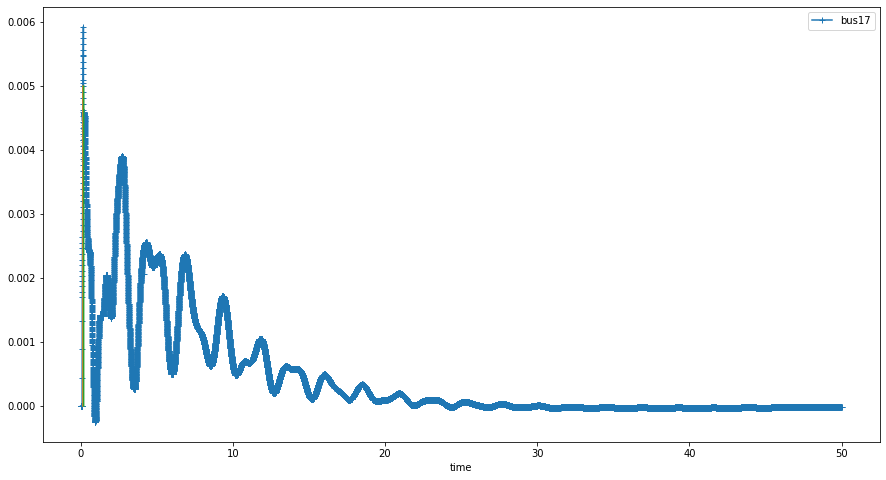

In [37]:
# fault
plt.figure(figsize=(15,8))
plt.plot(time, data, marker='+', label='bus17')

# plot anomalies ranging (start to end) for the very first detected anomaly (score?)
for i in range(1): # len(anomalies)
    plt.plot([time[int(anomalies[i][0])] for _ in range(len(data))],[i*0.005/len(data) for i in range(len(data))])
    plt.plot([time[int(anomalies[i][1])] for _ in range(len(data))],[i*0.005/len(data) for i in range(len(data))])
    
plt.ylabel('')
plt.xlabel('time')
plt.legend()

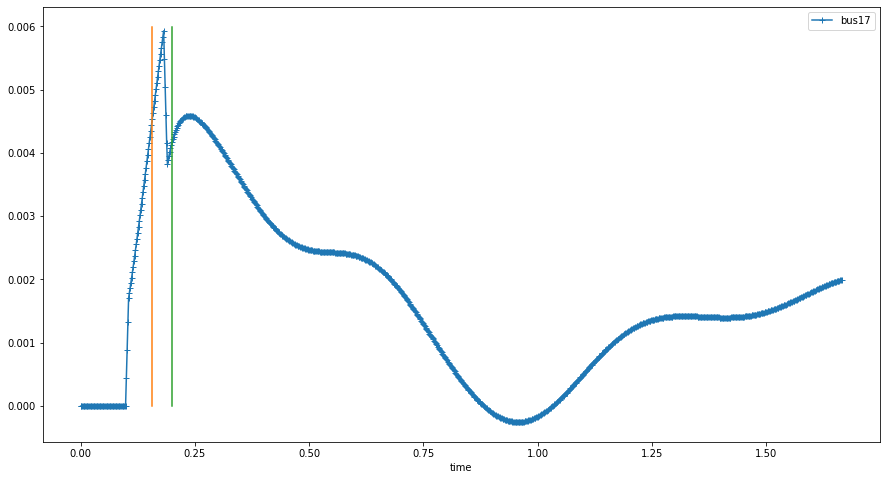

In [38]:
# fault (zoom in)
start = 0
end = 1000
plt.figure(figsize=(15,8))
plt.plot(time[start:end], data[start:end], marker='+', label='bus17')

# anomalies ranging (start to end) for the very first detected anomaly (score?)
for i in range(1): # len(anomalies)
    plt.plot([time[int(anomalies[i][0])] for _ in range(len(data))][start:end],[i*0.006/len(data[start:end]) for i in range(len(data))][start:end])
    plt.plot([time[int(anomalies[i][1])] for _ in range(len(data))][start:end],[i*0.006/len(data[start:end]) for i in range(len(data))][start:end])
    
plt.ylabel('')
plt.xlabel('time')
plt.legend()
plt.show()